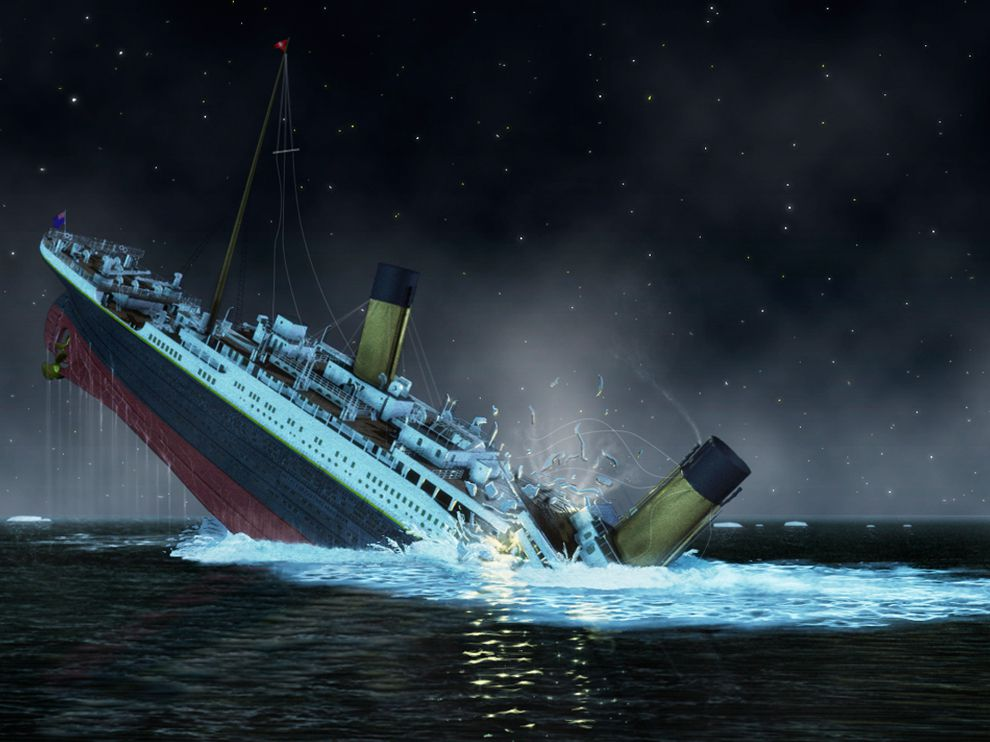

In [1]:
from IPython.display import Image
import os
Image('../input/photos3/titanic.jpeg')

#                              **Titanic - Machine Learning from Disaster**

In [2]:
import numpy as np
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train=pd.read_csv('/kaggle/input/titanic/train.csv',index_col='PassengerId')
test=pd.read_csv('/kaggle/input/titanic/test.csv',index_col='PassengerId')
train.head()

/kaggle/input/photos3/titanic.jpeg
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Missing Values**

<AxesSubplot:title={'center':'Train_Missing_Values'}>

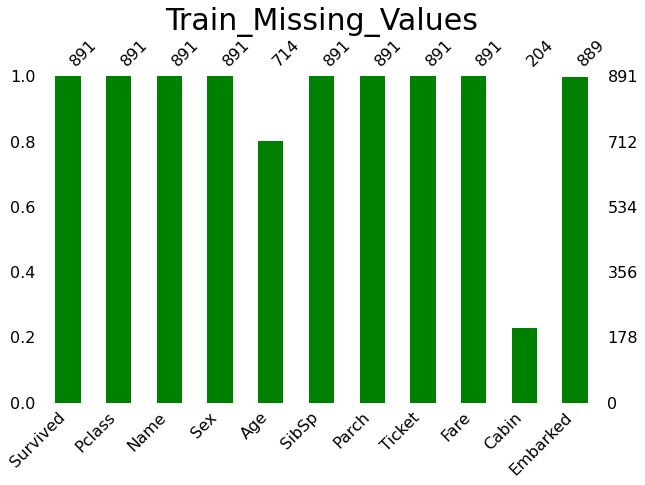

In [3]:
plt.title('Train_Missing_Values',fontsize=30)
msno.bar(train,figsize=(10,6),color='green')

<AxesSubplot:title={'center':'Test_Missing_Values'}>

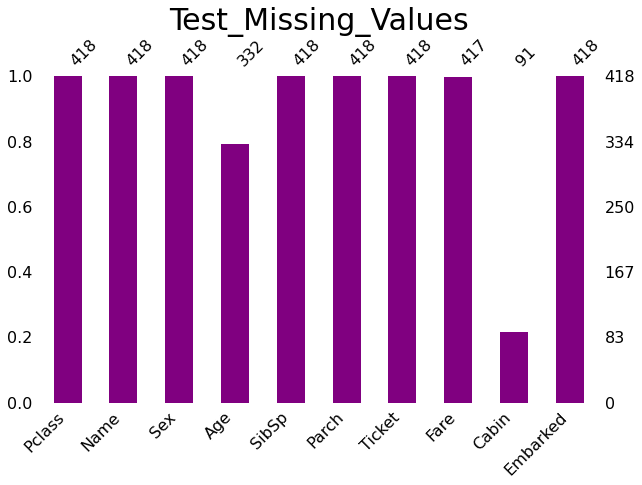

In [4]:
plt.title('Test_Missing_Values',fontsize=30)
msno.bar(test,figsize=(10,6),color='purple')

* **在Age裡面有大概20%的遺失值**

* **在Cabin裡面有太多的遺失值**

* **在Embarked裡面有2個遺失值**

In [5]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

<AxesSubplot:xlabel='Cabinboo', ylabel='Survived'>

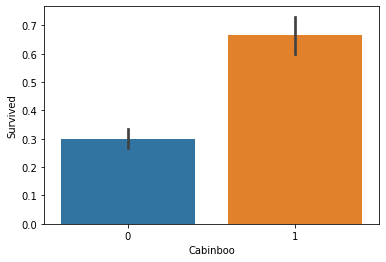

In [6]:
train['Cabinboo']=train['Cabin'].notnull().astype(int)
test['Cabinboo']=test['Cabin'].notnull().astype(int)
sns.barplot(x='Cabinboo',y='Survived',data=train)

In [7]:
train['Embarked'].value_counts()
train['Embarked']=train['Embarked'].fillna('S')

# **MissingValues Reference**
* 我們使用**平均值**來補充年齡的遺失值
* 而Cabin裏面，我們發現若Cabin為遺失值，死亡的機率逼近70%，若Cabin不是遺失值，死亡率只有30%，我們用這個下去做個特徵
* 在Embarked裏面有2個遺失值，我們使用眾數Ｓ來填充遺失值

# **Feature Engineering**

In [8]:
bins=[0,5,12,18,30,60,np.inf]
labels=['baby','children','teenagers','young adults','adults','seniors']
train['AgeG']=pd.cut(train['Age'],bins,labels=labels)
test['AgeG']=pd.cut(test['Age'],bins,labels=labels)

In [9]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
bins=[-1,10,30,50,100,np.inf]
labels=['1','2','3','4','5']
train['FareG']=pd.cut(train['Fare'],bins,labels=labels)
test['FareG']=pd.cut(test['Fare'],bins,labels=labels)

# **Feature Engineering Reference**
* 我們把年齡做一個分層，0-5為兒童，6-12為小孩,13-18為少年,19-30為青少年,30-60為成人,60-為老人
* 我們依據恐懼程度分為5級

# **Visualization**

<AxesSubplot:xlabel='AgeG', ylabel='Survived'>

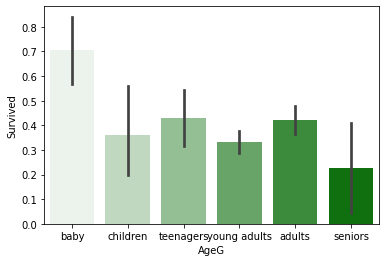

In [10]:
sns.barplot(x='AgeG',y='Survived',data=train,palette=sns.light_palette("green"))

<AxesSubplot:xlabel='FareG', ylabel='Survived'>

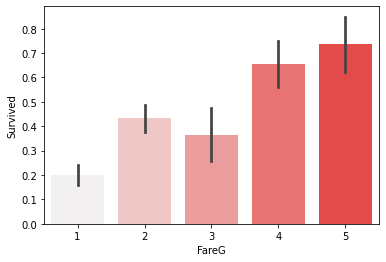

In [11]:
sns.barplot(x=train['FareG'],y=train['Survived'],palette=sns.light_palette('red'))

male: 0.18890814558058924
female: 0.7420382165605095


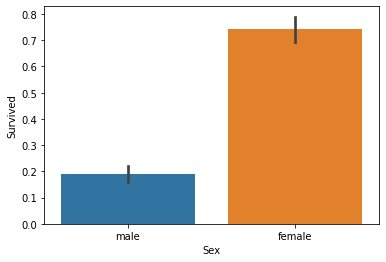

In [12]:
sns.barplot(x='Sex',y='Survived',data=train)
print('male:',train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1])
print('female:',train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1])

Pclass1: 0.6296296296296297
Pclass2: 0.47282608695652173
Pclass3: 0.24236252545824846


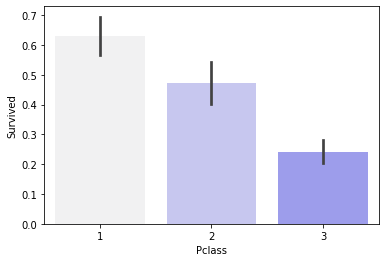

In [13]:
sns.barplot(x='Pclass',y='Survived',data=train,palette=sns.light_palette('blue'))
print('Pclass1:',train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1])
print('Pclass2:',train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1])
print('Pclass3:',train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1])

SibSp0: 0.34539473684210525
SibSp1: 0.5358851674641149
SibSp2: 0.4642857142857143
SibSp3: 0.25
SibSp4: 0.16666666666666666


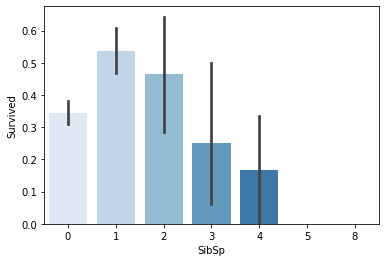

In [14]:
sns.barplot(x='SibSp',y='Survived',data=train,palette=sns.color_palette('Blues'))
print('SibSp0:',train['Survived'][train['SibSp']==0].value_counts(normalize=True)[1])
print('SibSp1:',train['Survived'][train['SibSp']==1].value_counts(normalize=True)[1])
print('SibSp2:',train['Survived'][train['SibSp']==2].value_counts(normalize=True)[1])
print('SibSp3:',train['Survived'][train['SibSp']==3].value_counts(normalize=True)[1])
print('SibSp4:',train['Survived'][train['SibSp']==4].value_counts(normalize=True)[1])

Parch0: 0.34365781710914456
Parch1: 0.5508474576271186
Parch2: 0.5
Parch3: 0.6


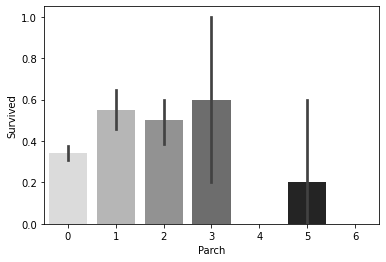

In [15]:
sns.barplot(x='Parch',y='Survived',data=train,palette=sns.color_palette('binary'))
print('Parch0:',train['Survived'][train['Parch']==0].value_counts(normalize=True)[1])
print('Parch1:',train['Survived'][train['Parch']==1].value_counts(normalize=True)[1])
print('Parch2:',train['Survived'][train['Parch']==2].value_counts(normalize=True)[1])
print('Parch3:',train['Survived'][train['Parch']==3].value_counts(normalize=True)[1])

# **Visualization Reference**
* 兒童的生存率是最高的，而老人的生存率是最低的
* 而恐懼分數越高，生存率越高
* 男性生存率只有18%，女性生存率有74%
* 社會經濟地位越高，生存率明顯較高
* 只有一個兄弟姊妹的人存活率最高，而越多兄弟姐妹，生存率越低

# **Ready to Train**

In [16]:
train=train.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

In [17]:
Sex_map={'male':0,'female':1}
train['Sex']=train['Sex'].map(Sex_map)
test['Sex']=test['Sex'].map(Sex_map)

In [18]:
train= pd.get_dummies(data=train,columns=['Embarked'])
test=pd.get_dummies(data=test,columns=['Embarked'])

In [19]:
AgeGmap={'baby':6,'children':5,'teenagers':4,'young adults':3,'adults':2,'seniors':1}
train['AgeG']=train['AgeG'].map(AgeGmap)
test['AgeG']=test['AgeG'].map(AgeGmap)

In [20]:
train['FareG']=train['FareG'].astype(int)
test['FareG']=test['FareG'].astype(int)
train['AgeG']=train['AgeG'].astype(int)
test['AgeG']=test['AgeG'].astype(int)

In [21]:
cols=['Name','Age','Fare']
train=train.drop(cols,axis=1)
test=test.drop(cols,axis=1)

# Modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
pred=train.drop('Survived',axis=1)
target=train['Survived']
x_train,x_val,y_train,y_val=train_test_split(pred,target,test_size=0.2)

In [23]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
lrscore=accuracy_score(y_pred,y_val)
lrscore

0.8379888268156425

In [24]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_val)
svmscore=accuracy_score(y_pred,y_val)
svmscore

0.8379888268156425

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
 
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None
                              )
 
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True)
bag.fit(x_train,y_train)
y_pred=bag.predict(x_val)
bagscore=accuracy_score(y_pred,y_val)
bagscore

0.8156424581005587

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=100,learning_rate=0.5)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_val)
adascore=accuracy_score(y_pred,y_val)
adascore

0.8156424581005587

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=500,max_depth=3)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_val)
rfscore=accuracy_score(y_pred,y_val)
rfscore

0.8324022346368715

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_val)
knnscore=accuracy_score(y_pred,y_val)
knnscore

0.770949720670391

In [29]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.5,reg_lambda=1,reg_alpha=1)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_val)
xgbscore=accuracy_score(y_pred,y_val)
xgbscore

[12:30:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8212290502793296

In [30]:
print('RandomForest:',rfscore)
print('KNeighborsClassifier:',knnscore)
print('AdaBoostClassifier:',adascore)
print('BaggingClassifier:',bagscore)
print('SVC:',svmscore)
print('xgb:',xgbscore)

RandomForest: 0.8324022346368715
KNeighborsClassifier: 0.770949720670391
AdaBoostClassifier: 0.8156424581005587
BaggingClassifier: 0.8156424581005587
SVC: 0.8379888268156425
xgb: 0.8212290502793296


* 這裡我們都使用Accuarcy_score來下去評估，而我們的模型中，以ＸＧＢ表現最佳，下面我們就都使用ＸＧＢ吧！
\begin{equation}
Accuracy = \frac{TN + TP}{TN + TP + FN + FP}
\end{equation}

# **Confusion_Matrix**

**混淆矩陣(confusion matrix)介紹**
* TP(True Positive): 正確預測成功的正樣本，為TP
* TN(True Negative): 正確預測成功的負樣本，為TN
* FP(False Positive): 錯誤預測成正樣本，為FP
* FN(False Negative): 錯誤預測成負樣本(或者說沒能預測出來的正樣本)，為FN


In [31]:
from sklearn.metrics import confusion_matrix
confmat=confusion_matrix(y_true=y_val,y_pred=y_pred)
print(confmat)

[[110  12]
 [ 20  37]]


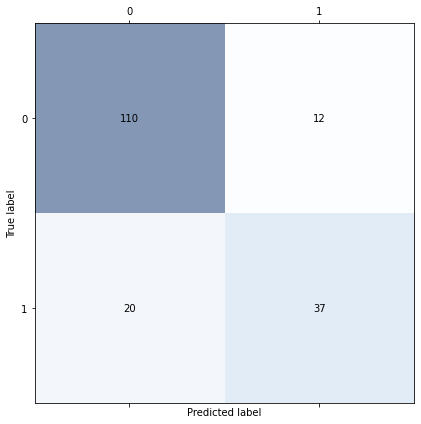

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
for i in range(confmat.shape[0]):
         for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
 
plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision_score:',precision_score(y_true=y_pred, y_pred=y_val))
print('Recall_score:',recall_score(y_true=y_pred, y_pred=y_val))
print('f1_score:',f1_score(y_true=y_pred, y_pred=y_val))

Precision_score: 0.6491228070175439
Recall_score: 0.7551020408163265
f1_score: 0.6981132075471698


* **Recall(召回率) = TP/(TP+FN)**

Recall_score是在所有正樣本當中，能夠預測多少正樣本的比例，準確率為在所有預測為正樣本中，有多少為正樣本

* **Precision(準確率) = TP/(TP+FP)**

Precision看的是在預測正向的情形下，實際的「精準度」是多少

* **F1-score = 2 * Precision * Recall / (Precision + Recall)**

F1-score則是兩者的調和平均數，算是一個比較概略的指標來看這個模型的表現

In [34]:
ids = test.index
predictions = xgb.predict(test)


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submissionXGB.csv', index=False)